# 분류 실습 : 캐글 신용카드 사기 검출

- Kaggle의 신용카드 데이터 세트를 이용해 신용카드 사기 검출 분류 실습  


- 데이터 다운로드 : https://www.kaggle.com/mlg-ulb/creditcardfraud  
credit card fraud

![image.png](attachment:image.png)

## Credit Card Fraud Detection ML 모델 구축
- 다양한 Feature Engineering 방식을 
- Logistic Regression과 LightGBM 방식을 이용하여 
- 각 방식에 적용 후 평가 비교

### Feature Engineering 
- 피처들 중 어떤 것이 모델링할 때 중요한 것인지 결정하는 과정
- 모델 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어서 굉장히 중요한 단계이며
- 전문성과 시간과 비용이 많이 드는 작업
- Feature Selection, Feature Extraction
- PCA 방식 사용

### 차원 축소
- 많은 피처로 구성된 다차원의 데이터 셋을
- 차원을 축소하여 새로원 차원의 데이터 세트를 생성하는 것

**PCA(Principal Component Analysis) : 주성분 분석**
- 대표적인 차원 축소 알고리즘
- 여러 변수 간 존재하는 상관관계를 이용해 
- 대표하는 주성분을 추출해서 차원을 축소하는 기법
- 간단하게 가장 높은 분산을 가지는 데이터의 축을 찾아 차원을 축소

### Log 변환
- 비대칭된 분포도를 가진 데이터 세트를 정규분포와 같이 대칭으로 변환하는 방식

![image.png](attachment:image.png)

### 이상치 탐지
- IQR(Inter Quantile Range), 사분위수(Quantile), Boxplot을 이용
    - 최대값 : 3분위수 + 1.5 * IQR
    - 최소값 : 1분위수 - 1.5 * IQR    

![image-2.png](attachment:image-2.png)

## imbalanced data set 가공을 위한 언더 샘플링/오버 샘플링

- 언더 샘플링(under sampling)
    - 많은 레이블을 가진 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식

- 오버 샘플링(over sampling)
    - 적은 레이블을 가진 데이터 세트를 많은 데이터 세트 수준으로 증식시키는 방식
    - 원본 데이터의 피처 값들을 약가만 변경하여 증식
    - 대표적인 방법이 SMOTE

![image-2.png](attachment:image-2.png)

### SMOTE(Synthetic Minority Over-sample Technique)
- 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃(K Nearest Neighbor)을 찾고,
- K개 이웃들과의 차이를 일정 값으로 만들어서
- 기존 데이터와 약간 차이가 나는 새로운 데이터 생성

![image-2.png](attachment:image-2.png)

### SMOTE 방식을 제공하는 패키지
- imblearn.over_sampling (imbalanced learn)  
- imbalanced-learn 설치 필요  
    - Anaconda Prompt를 관리자 권한으로 실행시키고 설치  
    - **`conda install -c conda-forge imbalanced-learn`**  
    - 중간에 y 입력

## 데이터 일차 가공 및 모델 학습/예측/평가

### 'creditcard.csv' 파일 데이터 로드

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
get_ipython().run_line_magic('matplotlib', 'inline')

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
card_df.shape

(284807, 31)

In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**creditcard 피처 정보**
- Time : 데이터 생성 관련한 속성으로 분석에 큰 의미가 없음 => 삭제
- Amount : 신용카드 트랜잭션 금액
- Class : 레이블, 0-정상, 1-사기

### 전처리 함수 ① : get_preprocessed_df() 작성 
- 원본 DataFrame은 유지하고 데이터 가공을 위한 DataFrame을 복사하여 반환

In [5]:
# 전처리 함수
# - Time 칼럼만 삭제
# - 원본 데이터 유지하고, 복사본 반환

from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

### 학습과 테스트 데이터 세트를 반환하는 함수 생성
- 사전 데이터 처리가 끝난 뒤 해당 함수 호출

**`get_train_test_dataset(df=None)`**

In [6]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1] # 피처 : 마지막 칼럼 전까지
    y_target = df_copy.iloc[:, -1] # 레이블 : 마지막 칼럼
    
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    # stratify: 타겟 값의 분포도에 맞춰, 학습과 테스트 맞춰서 분할 (레이)
    X_train, X_test, y_train, y_test =     train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [7]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [8]:
y_train.shape

(199364,)

In [9]:
y_train.value_counts()/y_train.shape[0]*100

0    99.827451
1     0.172549
Name: Class, dtype: float64

**학습/테스트 데이터 레이블 비율**

In [10]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


**LogisticRegression 알고리즘 적용하여 학습/예측/평가 수행**

In [11]:
# 먼저  LogisticRegression 부터 학습/예측/평가 수행

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [12]:
# 예측 평가 수행 함수 (앞에서 복사할 것)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [13]:
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284, F1: 0.7294, AUC:0.9650


### 모델을 학습/예측/평가를 위한 함수 생성
: 앞으로 피처 엔지니어링을 수행할 때마다 사용

**`get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None)`**

In [15]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### LightGBM 학습/예측/평가

- boost_from_average가 True일 경우 레이블 값이 극도로 불균형 분포를 이루는 경우 재현률 및 ROC-AUC 성능이 매우 저하됨

- LightGBM 2.1.0 이상 버전에서 이와 같은 현상 발생 
     - 디폴트가 True로 바뀌면서(이전에는 False)
     - True일 경우 전반적으로 좋은데
     - 레이블 값이 극도로 불균형 분포를 이루는 경우 재현률 및 ROC-AUC 성능이 매우 저하됨

In [17]:
from lightgbm import LGBMClassifier

# boost_from_average : 에러까지는 아닌데 T
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)

# 재현율이 LogisticRegression 보다 좋아졌음
# 그러나 많이 좋아질 수 있는 요소들이 있을 것이다

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC:0.9790


## 중요 데이터 분포도 변환 후 모델 학습/예측/평가

**중요 feature의 분포도 확인**

<AxesSubplot:xlabel='Amount', ylabel='Density'>

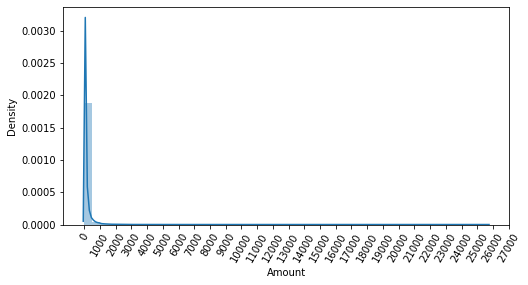

In [18]:
# 중요 속성으로 Amount 선정해서 분포도 확인

import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

### 전처리 함수 ② get_preprocessed_df() 수정
- StandardScaler를 이용하여 Amount 피처 변환 추가

In [20]:
from sklearn.preprocessing import StandardScaler

# scaled 된 값 Amount_Scaled 추가하고, 기존의 Time, Amount 피처 삭제
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [21]:
card_df2 = get_preprocessed_df(card_df)
card_df2.head()

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**StandardScaler 변환 후 로지스틱 회귀 및 LightGBM 학습/예측/평가**

In [22]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                          n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500, F1: 0.8409, AUC:0.9779


<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

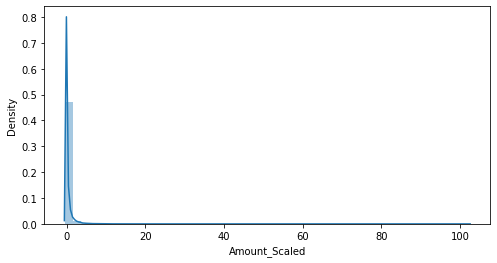

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.distplot(card_df2['Amount_Scaled'])


# ### 전처리 함수 ③ : get_preprocessed_df() 수정
# - 비대칭 분포를 갖는 Amount 피처를 로그 변환

In [24]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    
    # 넘파이의 로그 변환 함수는 np.log()인데
    # 보통 로그 변환할 때 log() 잘 안쓰고 log1p() 사용
    # 1p가 원 플러스로 하나를 더하겠다는 의미
    
    # Amount_Scaled 칼럼 추가하고 'Time','Amount' 삭제
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

---
##### log1p 와 expm1 설명  #####

In [25]:
# log1p 와 expm1 설명 
import numpy as np

# log(-1000)은 0 인데
print(1e-1000 == 0.0)

# log() 사용하면 -inf가 나옴
print(np.log(1e-1000)) 
# log() 사용 시 문제 : 

# log()에 1을 더하면 0이 됨
print(np.log(1e-1000 + 1))

# 그래서 1을 더한 log1p() 사용 : 0이 됨
print(np.log1p(1e-1000))

True
-inf
0.0
0.0


In [26]:
# log1p() 한 값을 원래 값으로 되돌릴 때는 expm1() 시용
# expm1() : 1을 뺀다는 의미
var_1 = np.log1p(100)
var_2 = np.expm1(var_1) 
print(var_1, var_2)

4.61512051684126 100.00000000000003


**Ammount 피처 로그 변환한 뒤 로지스틱회귀, LightGBM 학습/예측/평가**

In [27]:
# 학습/테스트 데이터 분리하고
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

# 예측 성능 확인
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC:0.9796


     => Amount 피처 로그변환하지 않은 데이터로 학습한 경우보다 약간씩 성능이 개선됨

<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

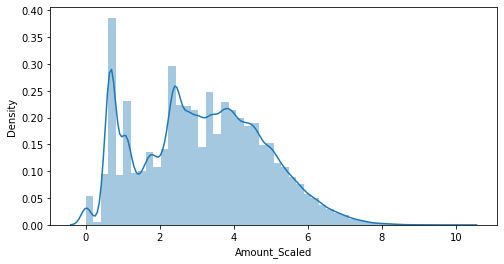

In [28]:
import seaborn as sns

card_df2 = get_preprocessed_df(card_df)
plt.figure(figsize=(8, 4))
sns.distplot(card_df2['Amount_Scaled'])

## 이상치 데이터 제거 후 모델 학습/예측/평가

### 각 피처들의 상관 관계 시각화 : 히트맵(heatmap)
- 결정 레이블인 class 값과 가장 상관도가 높은 피처 추출


- 추출한 다음 이 중에 상관도가 높은 피처들에 대해서 아웃 라이어 찾음


- 그 다음에 거기에 대한 아웃 라이어가 높은 피처들을 가지고 있는 레코드 삭제

<AxesSubplot:>

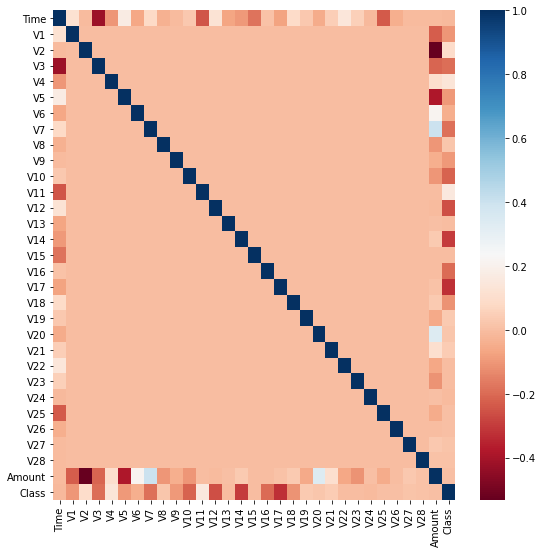

In [29]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr() # 각 칼럼들의 상관도 값 반환
sns.heatmap(corr, cmap='RdBu') 

- 히트맵에서 cmap을 'RdBu'로 설정해
    - 양의 상관관계가 높을수록 색깔이 진한 파란색에 가깝고,
    - 음의 상관관계가 높을수록 색깔이 진한 빨강색에 가깝게 표현됨

=> 레이블 Class와 상관관계가 가장 높은 피처는 V14와 V17 (음의 상관관계)

### 이상치 필터링을 위한 함수 작성 : get_outlier()
- Dataframe에서 outlier에 해당하는 데이터를 필터링
- outlier 레코드의 index를 반환함

In [32]:
# 아웃라이어를 찾기 위한 함수 새로 생성

import numpy as np

# weight는 boxplot에서 이상치 계산시 1.5*IQR(몸통)을 더하고, 뺀 값들이 이상치
# 전체 데이터에서 찾지 않고 사기 데이터 (Class가 1인)에서 찾음
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column] # column 값으로 V14 들어올 것임
    quantile_25 = np.percentile(fraud.values, 25) # 1분위수
    quantile_75 = np.percentile(fraud.values, 75) # 3분위수
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25

    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 데이터 프레임 인덱스 찾음
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

**피처 V14의 분포**
- 사분위수

In [33]:
np.percentile(card_df['V14'], 25) # 1분위수

-0.4255740124549935

In [34]:
np.percentile(card_df['V14'], 75) # 3분위수 : 상위 75%

0.493149849218149

In [35]:
#np.percentile(card_df['V14'].values, 100) 
np.max(card_df['V14'])

10.5267660517847

In [36]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)
# 4개 인덱스 : 이 인덱스에 해당되는 행은 삭제할 것임

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [37]:
card_df['V14'][8296]

-19.2143254902614

In [38]:
card_df['V14'][100]

0.796994975493623

<AxesSubplot:xlabel='V14', ylabel='Density'>

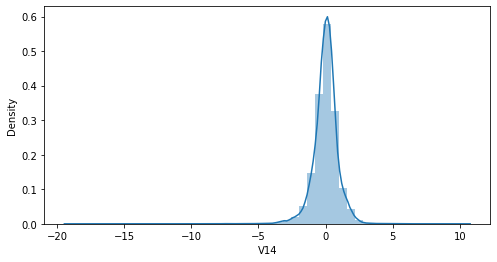

In [39]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.distplot(card_df['V14'])

### 전처리 함수 ④ : get_processed_df( )
- Amount 피처 로그 변환
- V14 피처의 이상치 데이터 삭제

In [40]:
# 이상치 데이터 삭제하는 로직 추가

# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True) # axis=0 : 행 삭제
    return df_copy

### 로그변환, 이상치 제거 후 모델들을 재 학습/예측/평가

In [41]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC:0.9780


    => 이상치 제거 후 로지스틱 회귀와 LightGBM 모두 예측 성능이 크게 향상됨

## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [44]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE(random_state=0) 

# train 데이터 세트로 들어오는 값들에 대해서 오버샘플링 시작
# 타겟값의 분포에 맞춰 피처값 생성

# 교재 smote.fit_sample()의 경우 : 'SMOTE' object has no attribute 'fit_sample' 오류 메시지발생
# smote.fit_resample()로 변경

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 전체 데이터 : 284,807 
# 테스트 : 30 %, train : 70 %
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [45]:
# 원래는 이랬음
y_train.value_counts()
# 전체 0.1 % 만 1 값이었음

0    199020
1       342
Name: Class, dtype: int64

###  오버샘플링된 데이터로 로지스틱 회귀로 학습/예측/평가

In [46]:
# 증식된 데이터에 기반해서 다시 모델 학습/예측/평가 

lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, 
                     tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1: 0.1023, AUC:0.9737


**Precision-Recall 곡선 시각화**

In [47]:
# 3장에서 사용한 것 그대로 복사해서 사용

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
get_ipython().run_line_magic('matplotlib', 'inline')

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

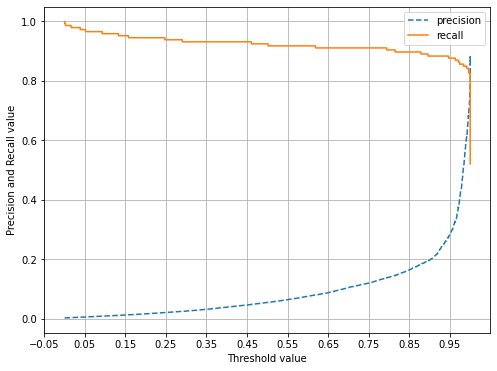

In [48]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )
# 재현율은 좋은데 정밀도 너무 낮음

### 오버샘플링된 데이터로 LightGBM 모델 적용

In [50]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

# 샘플링된 데이터 세트 사용
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, F1: 0.8794, AUC:0.9814


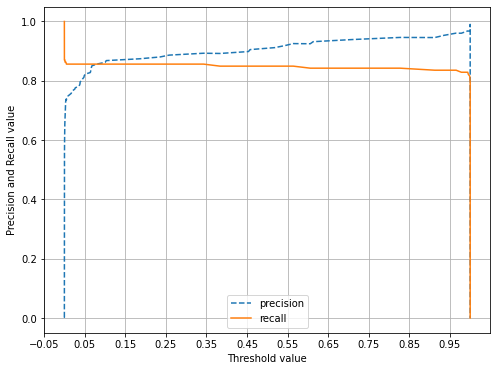

In [51]:
precision_recall_curve_plot( y_test, lgbm_clf.predict_proba(X_test)[:, 1] )

In [52]:
# ![image.png](attachment:image.png)

# - SMOTE 오버샘플링된 경우의 재현율이 이상치만 제거한 경우 보다 더 높아짐
# - SMOTE를 적용하면 재현율은 높아지나 정밀도는 낮아지는 것이 일반적임
# - 좋은 SMOTE 패키지일수록 재현율 증가율을 높이고, 정밀도 감소율은 낮출 수 있도록 효과적으로 데이터를 증식함